# importing packages and dependency

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier

# data collection

In [2]:
dataset=pd.read_csv(r"C:\Users\owner\Downloads\archive (12)\diabetes.csv")
check=dataset.copy()
check.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# data exploration
#### cheking and fixing nulls and duplicates

In [3]:
print(check.isnull().values.any())

False


In [4]:
print(check.duplicated().values.any())

False


#### checking the data types of the columns

In [5]:
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    int64  
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   769 non-null    int64  
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


#### checking and fixing the scaling of th features with respect to the target

In [6]:
check.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,3.840052,120.897269,69.115735,20.509753,79.697009,31.998179,0.471590,33.269181,0.349805
std,3.370237,31.951886,19.345296,15.959020,115.203999,7.880557,0.331208,11.778737,0.477219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.000000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


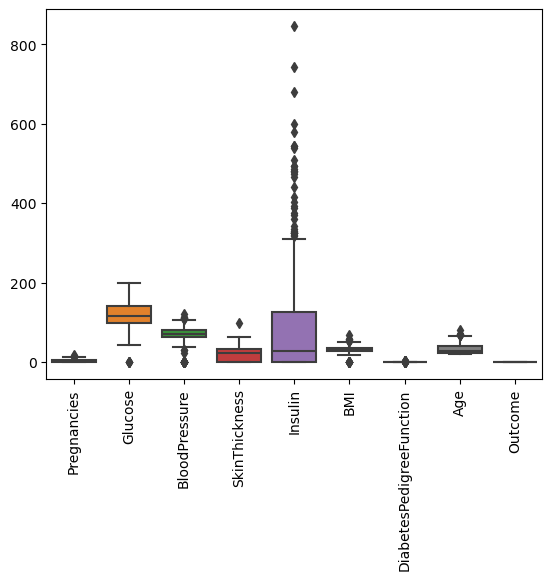

In [7]:
ax=sns.boxplot(check)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [8]:
for cols in check.columns:
    scale=MinMaxScaler(feature_range=(0,1))
    check[cols]=scale.fit_transform(check[[cols]])


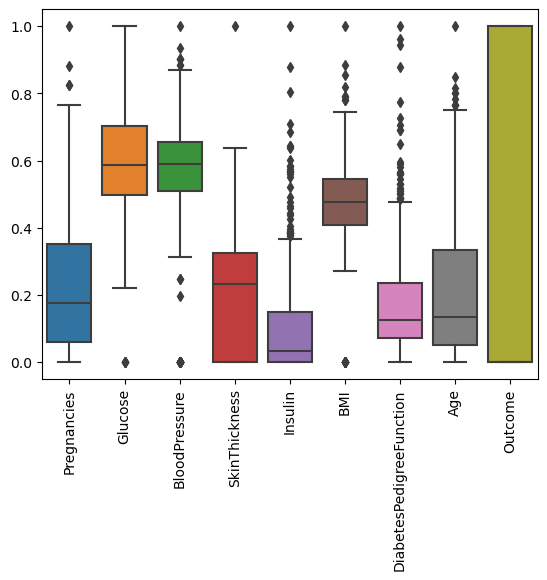

In [9]:
ax=sns.boxplot(check)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

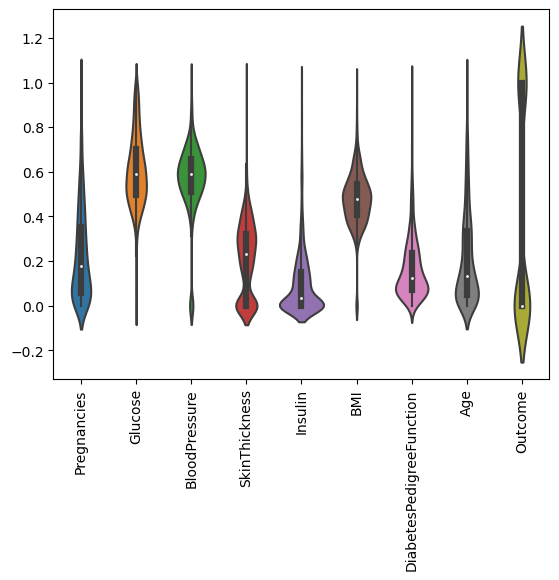

In [10]:
ax=sns.violinplot(check)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [11]:
check.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,0.225885,0.607524,0.566522,0.207169,0.094205,0.476873,0.168057,0.204486,0.349805
std,0.198249,0.160562,0.158568,0.161202,0.136175,0.117445,0.141421,0.196312,0.477219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070880,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.034279,0.476900,0.125107,0.133333,0.000000
75%,0.352941,0.703518,0.655738,0.323232,0.150118,0.545455,0.233988,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### checking for multicollinearity among features

In [12]:
check.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129251,0.140542,-0.079606,-0.072435,0.016854,-0.032500,0.539932,0.219418
Glucose,0.129251,1.000000,0.152608,0.057156,0.331197,0.221074,0.137241,0.263087,0.466132
BloodPressure,0.140542,0.152608,1.000000,0.206442,0.088534,0.282010,0.040896,0.239950,0.065706
SkinThickness,-0.079606,0.057156,0.206442,1.000000,0.437324,0.391159,0.184788,-0.116686,0.072298
Insulin,-0.072435,0.331197,0.088534,0.437324,1.000000,0.197274,0.185552,-0.043700,0.129137
BMI,0.016854,0.221074,0.282010,0.391159,0.197274,1.000000,0.140107,0.037467,0.293253
DiabetesPedigreeFunction,-0.032500,0.137241,0.040896,0.184788,0.185552,0.140107,1.000000,0.031882,0.172406
Age,0.539932,0.263087,0.239950,-0.116686,-0.043700,0.037467,0.031882,1.000000,0.240816
Outcome,0.219418,0.466132,0.065706,0.072298,0.129137,0.293253,0.172406,0.240816,1.000000


C:\Users\owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

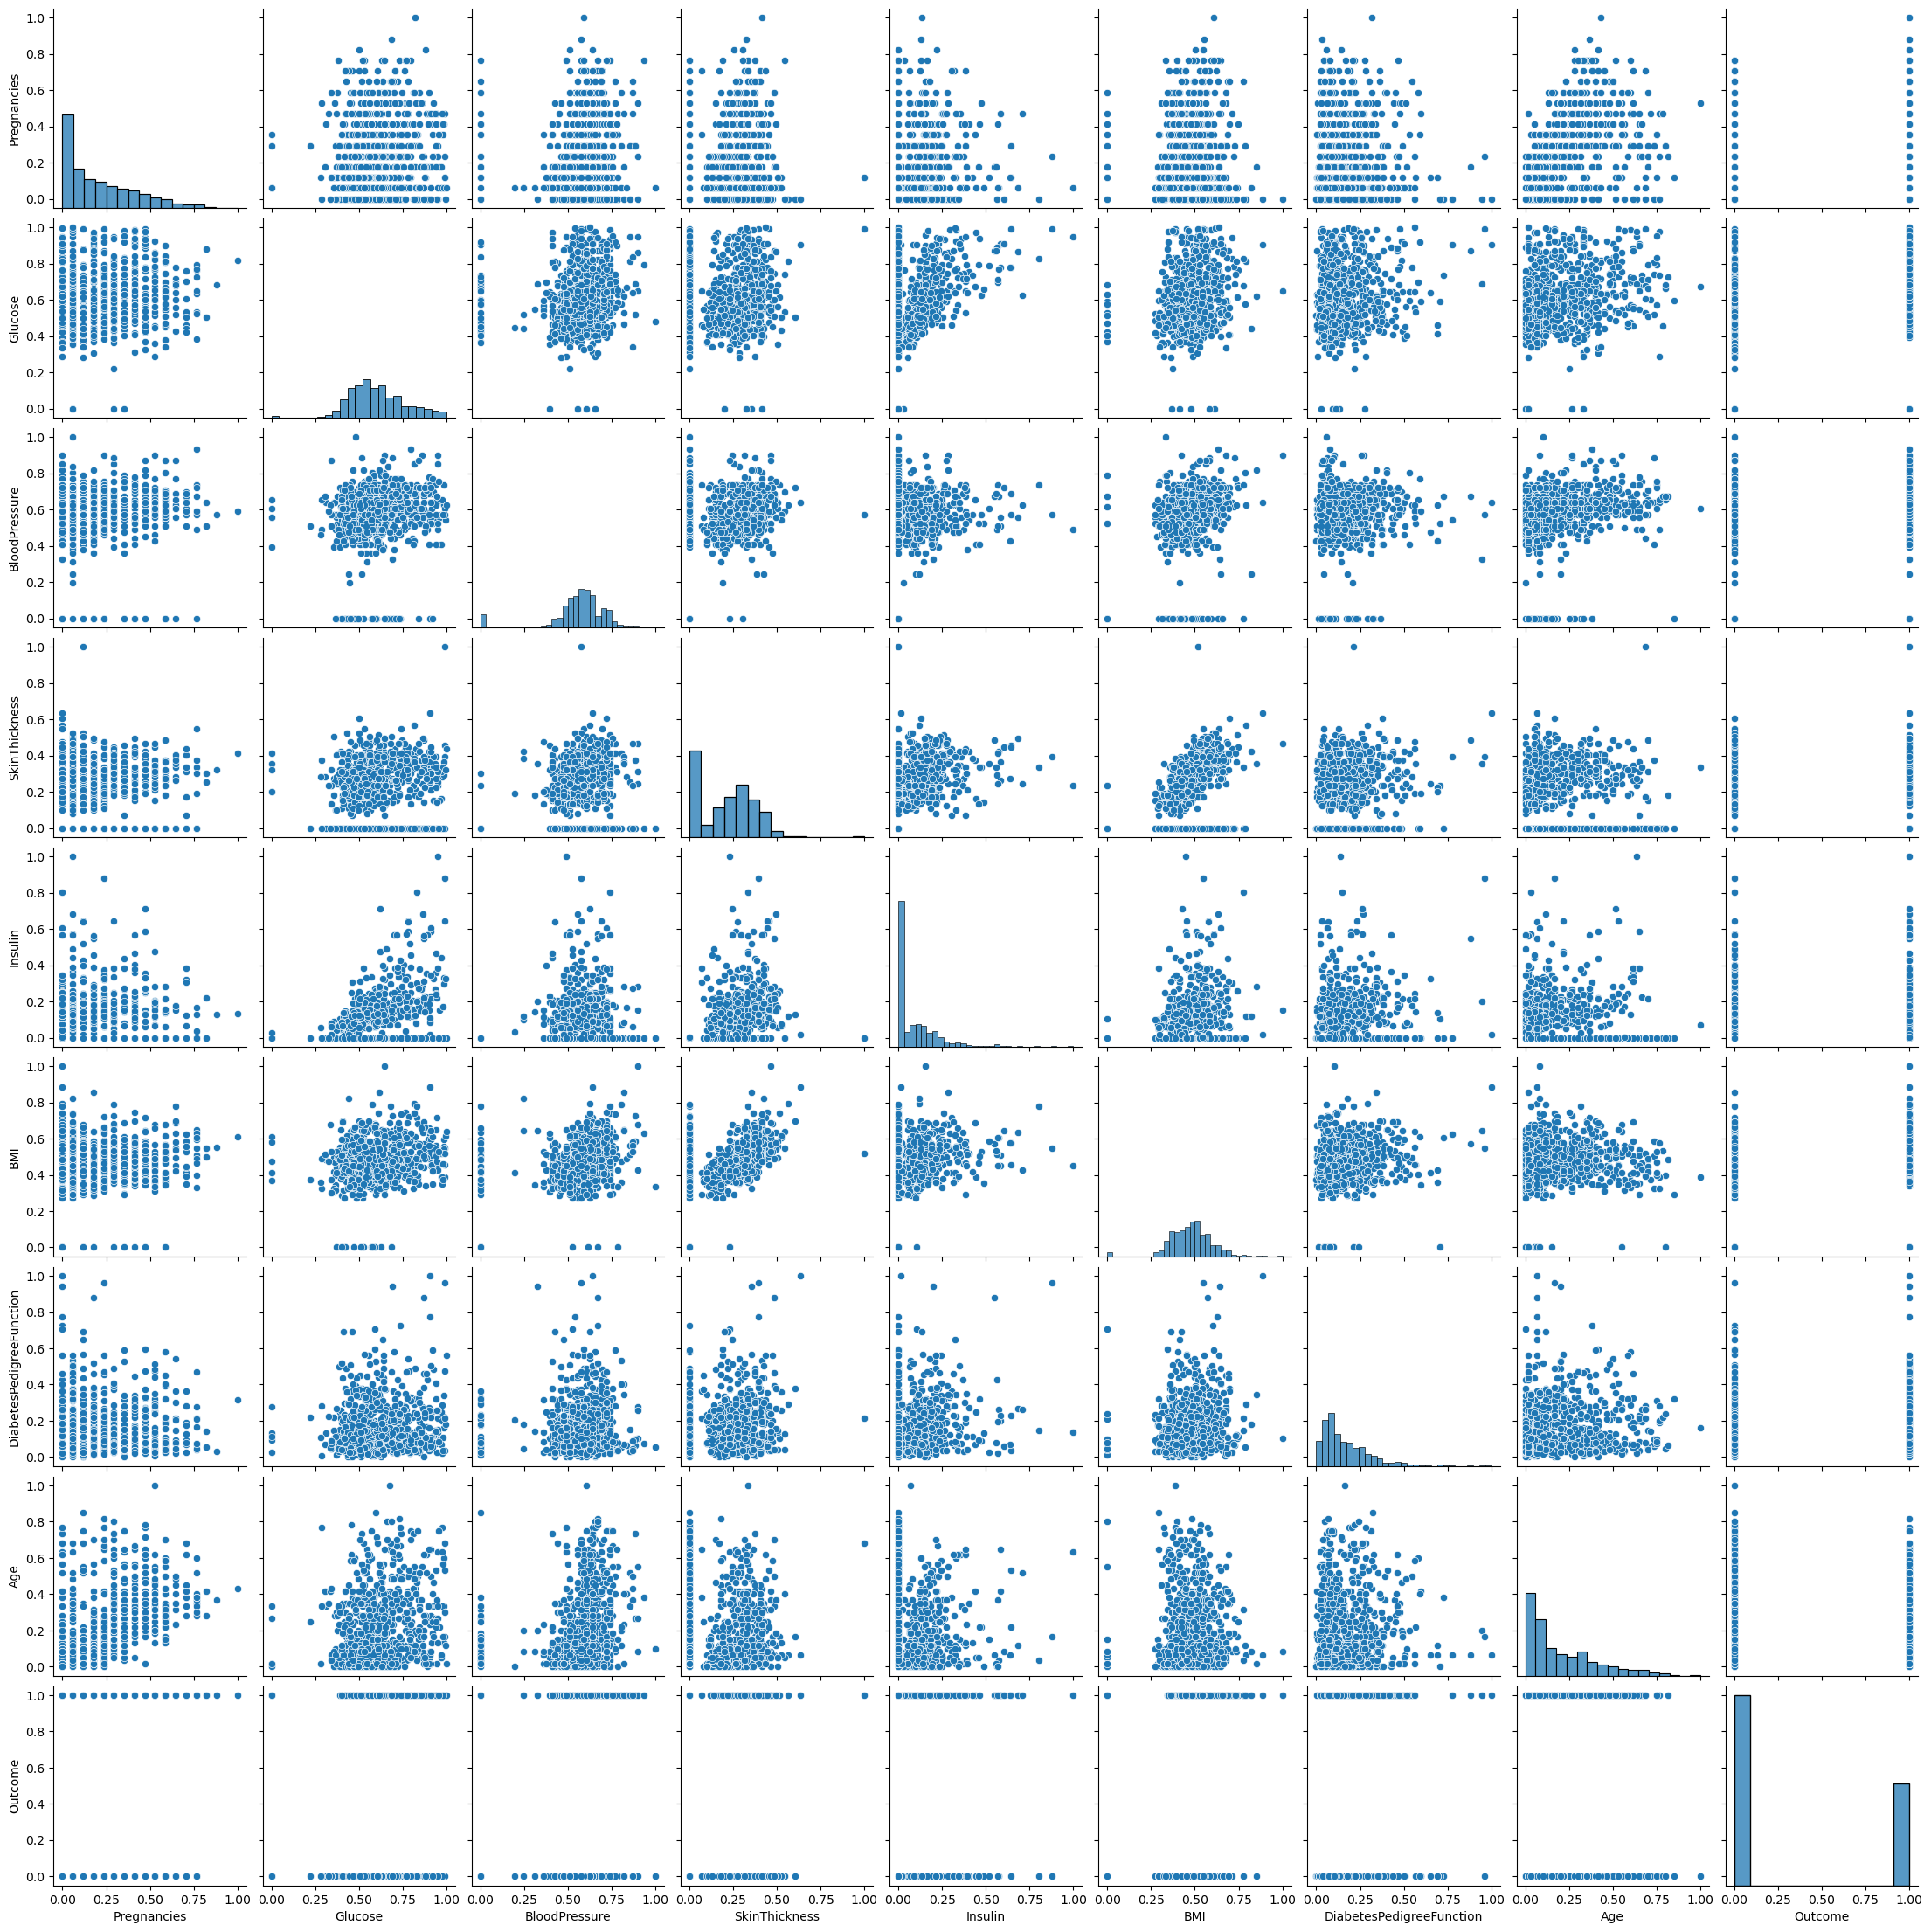

In [13]:
sns.pairplot(check)
plt.show()

When you see low correlation values (like 0.07, -0.01) in data.corr() but observe vertical lines in a pairplot() as in the case of the pregnancy featuresabove, it can indicate a few things:

Possible Explanations

Discrete Values:

If one of the variables in the pairplot has discrete values (e.g., categorical data encoded as integers), it can create vertical lines. This happens because the discrete variable takes on only a few distinct values, leading to vertical alignment in the scatter plot.

Outliers:

Outliers in the data can create patterns that look like vertical lines. These outliers might not significantly affect the correlation coefficient but can be visually prominent in the pairplo.

Non linear_relationships




so since pregnancy is a non nominal data feature as it shows some kind of inherent order and ranking we go with the used lebel encoding that we haven.


In [14]:
check['Pregnancies'].nunique()

17

The Pregnancies column with values ranging from 1 to 17 likely represents the number of times a person has been pregnant. This kind of data is often found in medical or health-related datasets, such as those used for predicting diabetes or other health conditions.

# checinking the class weight balance

In [15]:
uniq,count=np.unique(check['Outcome'], return_counts=True)

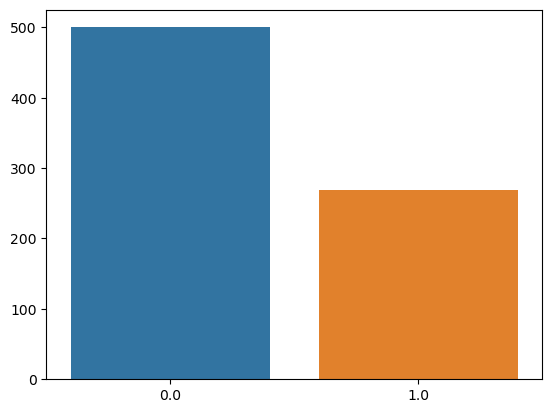

In [16]:
outcome_dist={'class':uniq, 'frequency':count}
sns.barplot(outcome_dist, x='class', y='frequency')
plt.show()

#### since the class weight is not evenly distributed we calculate the ratio that will be used to get a balanced training

In [17]:
outcome_dist['weight']=[i/sum(outcome_dist['frequency']) for i in outcome_dist['frequency']]
outcome_dist['train_weight']=[1/i for i in outcome_dist['weight']]

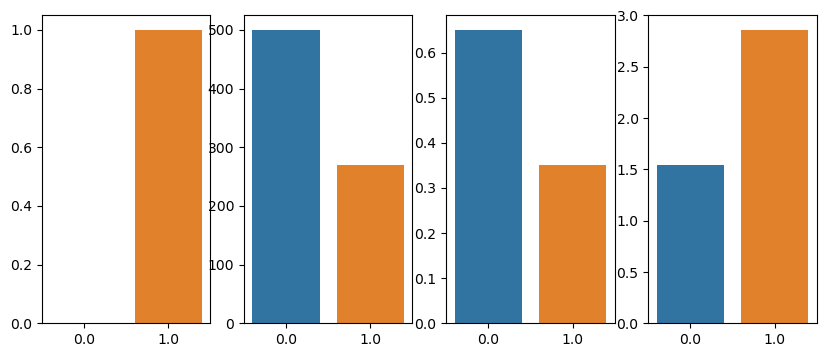

In [18]:
plt.figure(figsize=(10,4))
for i,col in enumerate(list(outcome_dist.keys()), start=1):
    plt.subplot(1,4,i)
    sns.barplot(outcome_dist, x='class', y=col)
plt.show()

In [19]:
class_weight={cls:wei for cls,wei in zip(outcome_dist['class'], outcome_dist['train_weight'])}

In [20]:
class_weight

{0.0: 1.538, 1.0: 2.858736059479554}

# spliting data

In [21]:
target=dataset['Outcome'].to_numpy().reshape(-1,1)
predictor=dataset.drop(columns=['Outcome']).to_numpy()
target.shape, predictor.shape

((769, 1), (769, 8))

In [22]:
xtrain, xtest, ytrain, ytest=train_test_split(predictor, target, test_size=0.2)
xdev, xval, ydev, yval=train_test_split(xtest, ytest, test_size=0.5)

In [23]:
def preprocess_train(xtrain):
    scaler_list=[]
    for col in range(xtrain.shape[1]):
        scaler=MinMaxScaler(feature_range=(0,1))
        scaler.fit(xtrain[:,col].reshape(-1,1))
        scaler_list.append(scaler)
        xtrain[:,col]=scaler.transform(xtrain[:,col].reshape(-1,1)).reshape(-1,)
    print(f" there are {xtrain.shape[1]}features and {len(scaler_list)}scaler")
    return xtrain, scaler_list

def preprocess_test(xtest, scaler_list):
    for i,scaler in enumerate(scaler_list):
        xtest[:,i]=scaler.transform(xtest[:,i].reshape(-1,1)).reshape(-1,)
    return xtest

In [24]:
xtrain_nm, scaler_list=preprocess_train(xtrain)

 there are 8features and 8scaler


In [25]:
xdev_nm=preprocess_test(xdev, scaler_list)

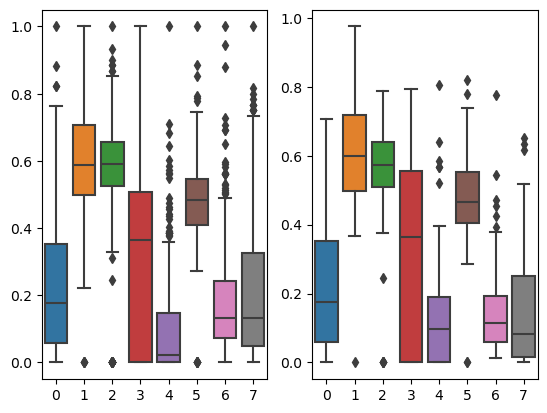

In [26]:
plt.subplot(1,2,1)
sns.boxplot(xtrain_nm)
plt.subplot(1,2,2)
sns.boxplot(xdev_nm)
plt.show()

In [27]:
Xscaler=StandardScaler()
Xscaler.fit(xtrain_nm)
xtrain_sc=Xscaler.transform(xtrain_nm)
xdev_sc=Xscaler.transform(xdev_nm)

In [28]:
cls, freq=np.unique(ytrain, return_counts=True)
weight=[i/sum(freq) for i in freq]
train_weight=[1/i for i in weight]
cls_weight={i:wei for i,wei in zip(cls,train_weight)}
cls_weight

{0: 1.5336658354114714, 1: 2.8738317757009346}

In [33]:
def logistic_model_check(xtrain, xtest, ytrain, ytest ):
    model_check={'model_name':[], 'accuracy':[], 'test_accuracy':[]}
    classification_models = [
        LogisticRegression(),
        RidgeClassifier(),
        SGDClassifier(),
        Perceptron(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis(),
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier(),
        KNeighborsClassifier(),
        GaussianNB(),
        #MultinomialNB(), This classifier is designed for count data, which should be non-neg
        BernoulliNB(),
        MLPClassifier(),
        GaussianProcessClassifier()
    ]
    for model in classification_models:
        model_init=model
        model_check['model_name'].append(str(model_init).split('.')[-1])
        model.fit(xtrain, ytrain)
        ypred=model.predict(xtrain)
        ypred_test=model.predict(xtest)
        acc=accuracy_score(ytrain, ypred)
        acc_test=accuracy_score(ytest, ypred_test)
        model_check['accuracy'].append(np.round(acc, 2))
        model_check['test_accuracy'].append(np.round(acc_test,2))
    return pd.DataFrame(model_check)


In [34]:
model_check=logistic_model_check(xtrain_sc, xdev_sc, ytrain, ydev)
model_check

C:\Users\owner\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

,model_name,accuracy,test_accuracy
0,LogisticRegression(),0.77,0.74
1,RidgeClassifier(),0.78,0.74
2,SGDClassifier(),0.66,0.69
3,Perceptron(),0.50,0.57
4,LinearDiscriminantAnalysis(),0.77,0.74
5,QuadraticDiscriminantAnalysis(),0.75,0.71
6,SVC(),0.82,0.74
7,DecisionTreeClassifier(),1.00,0.64
8,RandomForestClassifier(),1.00,0.74
9,GradientBoostingClassifier(),0.92,0.71


### Gradient boosting classifier looks best

In [37]:
DiabetisRisk=GradientBoostingClassifier()
DiabetisRisk.fit(xtrain_sc,ytrain)
ypred=DiabetisRisk.predict(xtrain_sc)
ypred_dev=DiabetisRisk.predict(xdev_sc)
acc=accuracy_score(ytrain, ypred)
acc_dev=accuracy_score(ypred_dev, ydev)
print(acc, acc_dev)

C:\Users\owner\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9186991869918699 0.7402597402597403


In [ ]:
import joblib
model = joblib.load('DiabetisRisk.pkl')


def preprocess_info():
    info={'Pregnancy':pregnancy,
       'Glucose_level':glucose,	
       'BloodPressure':BloodPressure,
       'SkinThickness':SkinThickness,	
       'Insulin':Insulin,	
       'BMI':BMI,
       'DiabetesPedigreeFunction':DiabetesPedigreeFunction,
          'Age':Age,
      }
    info=pd.DataFrame(info, index=[0])
    predictor=info.to_numpy()
    return predictor

# Load the scaler_list and scaler_yr from files
scaler_list = joblib.load('diabetis_scaler_list.pkl')
Xscaler=joblib.load('diabetis_Xscaler.pkl')
model=joblib.load('DiabetisRisk.pkl')
def preprocess_test(xtest, scaler_list):
    for i,scaler in enumerate(scaler_list):
        xtest[:,i]=scaler.transform(xtest[:,i].reshape(-1,1)).reshape(-1,)
    return xtest

xtest=Xscaler.transform(xtest)

prediction =model.predict(xtrain_sc)


In [3]:
import joblib

# Load the model
model = joblib.load(r"C:\Users\owner\Downloads\model\DiabetisRisk.pkl")

# Check the metadata
metadata = joblib.load(r"C:\Users\owner\Downloads\model\DiabetisRisk.pkl", mmap_mode='r')
print(metadata)



GradientBoostingClassifier()


In [ ]:
import joblib

# Load the model
model = joblib.load(r"C:\Users\owner\Downloads\model\Advert_model.pkl")

# Check the scikit-learn version used to save the model
print(model.__getstate__()['scikit_learn_version'])


In [ ]:
import joblib

# Load the model
model = joblib.load(r"C:\Users\owner\Downloads\model\PenguineType.model.pkl")

# Check the scikit-learn version used to save the model
print(model.__getstate__()['scikit_learn_version'])